In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test(1).csv")
train = train[train['observation'] == 'PM2.5']
test = test[test['AMB_TEMP'] == 'PM2.5']
train.shape


(240, 27)

In [4]:
train = train.iloc[:,3:]
test = test.iloc[:,2:]


In [5]:
train = np.array(train, dtype = 'float32')
test = np.array(test, dtype = 'float32')

In [6]:
train = train.reshape(1,train.shape[0]*train.shape[1])
PM = train
train.shape

(1, 5760)

In [7]:
#数据归一化 参考追风者
PM_mean = int(PM.mean())
PM_theta = int(PM.var()**0.5)
PM = (PM - PM_mean) / PM_theta

np.random.seed(3)
W = np.random.randn(1,10) * 0.01
# b = np.zeros((1,1))

In [8]:
PM

array([[ 0.3125,  1.125 ,  0.9375, ..., -0.25  ,  0.1875,  0.5   ]],
      dtype=float32)

In [9]:
#正向传播以及梯度下降
costs = []
lean_rate = 0.1
m = PM.shape[1] - 9
for i in range(150):
    cost = 0
    grad = 0
    for j in range(m):
        x = np.array(PM[:,j:j+9])
        x = np.insert(x,0,1).reshape(10,1)
        error = PM[:,j+9] - np.dot(W,x)
        cost += float(error**2) 
        grad += (error) * x.T
    cost = cost / (2*m)
    costs.append(cost)
    dW = grad/m
    if i % 10 == 0 :
        print(cost)
    W = W + lean_rate*dW

        

0.5652798942384871
0.14202641417161768
0.11703061312420956
0.10595212665605298
0.09941230484106459
0.09506424186473232
0.09195435139690422
0.0896142029644447
0.08778671006443074
0.08631852976993327
0.08511222861343681
0.08410285261918274
0.08324543797714005
0.0825078805668368
0.0818666452148035


In [10]:
W

array([[ 0.00235342, -0.00162907,  0.01444095,  0.00483302, -0.02553095,
         0.04194151,  0.13224215, -0.29822641,  0.1256594 ,  0.91789677]])

In [11]:
%matplotlib inline

Text(0.5,1,'learn = 0.1')

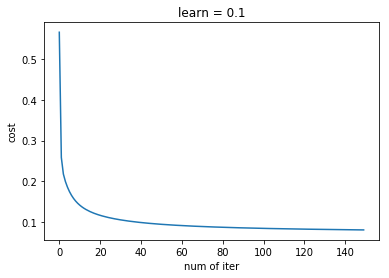

In [12]:
plt.plot(costs)
plt.xlabel("num of iter")
plt.ylabel("cost")
plt.title("learn = 0.1")

In [13]:
#处理测试数据
test = pd.read_csv("test(1).csv")
test = test[test['AMB_TEMP'] == 'PM2.5']
test = test.iloc[:,2:]
x = test.insert(0,0,1)
test = np.array(test, dtype = 'float32')

In [14]:
test.shape

(240, 10)

In [15]:
test = test.T
test.shape

(10, 240)

In [16]:
# test_mean = int(test.mean())
# test_theta = int(test.var()**0.5)
# test = (test - test_mean) / test_theta

In [17]:
y_pred = np.dot(W,test)  #正向传播

In [18]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [28]:
y_pred

array([[ 25.654,  58.525,  18.817,  25.794,   9.285,  30.224,  37.3  ,
         13.909,  43.815,  31.642,  36.376,  56.119,  36.258,  34.485,
         27.223,  11.08 ,  51.26 ,  19.452,  15.434,  16.663,  13.164,
         22.91 ,  35.852,   7.85 ,  55.94 ,  41.814,  26.409,   8.087,
         27.388,  33.219,  15.603,  10.601,  14.597,   4.908,  15.952,
         38.081,  19.965,  27.668,   4.192,  57.221,  42.335,  16.82 ,
         47.952,  16.707,  40.662,  49.36 ,  60.735,  37.526,  47.44 ,
         39.14 ,  28.975,  21.49 ,  43.169,  25.039,  36.357,  37.586,
         23.773,  19.361,  36.51 ,  30.554,  11.476,  24.267,  28.435,
         50.73 ,  46.471,  25.342,  38.153,  52.779,  26.587,  37.059,
         62.182,  50.976,  41.633,   9.776,  10.099,  33.33 ,  58.082,
          2.119,  45.18 ,  37.071,   5.552,  18.788,   7.393,  34.044,
          8.142,   3.287,  15.097,   9.597,  10.102,  22.271,  27.702,
          9.713,  10.515,   8.074,  33.061,  13.918,  13.993,   6.354,
      

In [21]:
answer = pd.read_csv("answer.csv")
answer = answer["value"].values.shape

In [26]:
answer.reshape(1,240)

array([[ 33,  60,  16,  33,   5,  41,  46,  25,  38,  26,  31,  59,  41,
         45,  23,  18,  51,  30,  19,  20,  16,  31,  44,   4,  63,  48,
         26,   1,  21,  48,  31,  15,  21,   4,  14,  39,  15,  28,  12,
         54,  47,  20,  59,  17,  54,  51,  62,  37,  54,  42,  39,  29,
         43,  21,  30,  43,  17,  19,  39,  27,  10,  25,  27,  66,  52,
         24,  49,  54,  25,  39,  68,  43,  51,  12,  13,  25,  66,   4,
         43,  36,  13,  34,   7,  24,  10,   7,  15,   6,  16,  19,  42,
         11,  14,  17,  38,  11,  19,   6,   9,   5,   7,  17,   6,   8,
          5,  37,  31,   0,  20,  20,  21,  14,  10,  27,  13,  13,   4,
         40,  34,   0,   2,  12,  16,  21,   6,  27,  28,   9,  23,  25,
          0,  34,  11,  17,  25,  27,   6,  26,  71,  53,  21,  19,  27,
         11,  12,  17,  11,   4,  17,  10,  43,  21,  18,  13,  11,  13,
         20,  38,  10,  28,  47,  17,  70,  14,  35,  31,  17,   6,  63,
         24,  18,  70,  14,  11,  18,   0,   9,  18

In [27]:
np.sum((y_pred - answer)**2)/240

56.7492229417811